# Setup

In [1]:
import importlib
import os
from pathlib import Path

os.environ["STEP_SYSINFO"] = "false"

import humanize
import lector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.csv
from grapy.core.api import Import
from grapy.embed.api import LinkEmbeddings
from grapy.ml.api import ClusterEmbeddings, Embed, Layout, Train
from IPython.core.display import HTML
from loguru import logger as LOG
from rich.pretty import pprint

LOG.disable("grapy")
%xmode Minimal

def scatter(*args, figsize=(10,10), **kwargs):
    plt.figure(figsize=figsize)
    plt.scatter(*args, **kwargs);
    plt.axis('off');
    

HTML("""<style>div.output_stderr {background: #fff;}</style>""")

data = Path("/home/thomas/data/lector")
files = {name: data / f"{name}.csv" for name in ("example", "example2", "md", "lg")}

10:54:11 | INFO    |   register: No socket file at __messages__.sock. Will proceed with standard logging.


Exception reporting mode: Minimal


# The magic of type-dispatched data science

- Each step in graphext's recipes corresponds to a python function (class)


- Steps expect, inspect and validate all column data types to be correctly typed
  - 😊 Prevents almost all user errors in Graphext (in recipes)
  - 🧱 Makes it less like programming and more like visual composition
  - 🧙🏽 Many things can be inferred and automated when knowing the data types
      - 🪄 e.g. suggested recipes, and transformations, automatic data wrangling etc.      
      - 📈 what kind of chart to use to visualize the data
      - 🚀 time-to-insight 


- ⏱️ Asking users for types is fast and cheap; and inference should be too ;)

<img src="./assets/magic.png" alt="alt_text" align="centre" width="1000" />


## Magic trick #1

In [6]:
_ , __, df = Import()("/home/thomas/data/lector/churn.csv")
df["embedding"] = Embed(n_neighbors=30, min_dist=0.1, verbose=False)(df.drop(columns="Left"))
df[["x", "y"]] = Layout(n_neighbors=30, min_dist=0.8, verbose=False)(df.drop(columns="Left"))
df["clusters"] = ClusterEmbeddings(reduce=None)(df.embedding)

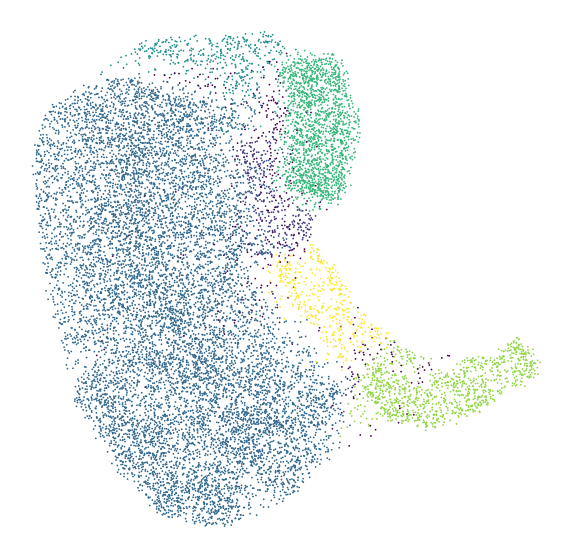

In [9]:
scatter(df.x, df.y, s=0.55, c=df.clusters.cat.codes, figsize=(10, 10))

## Magic trick #2

In [10]:
columns = [
    "Satisfaction Level",
    "Average Monthly Hours",
    "Last Evaluation",
    "Years in the Company",
    "salary",
    "Date Hired",
    "Left"
]

pred, model, info = Train(target="Left", params={"verbose": False})(df[columns])

In [11]:
pprint(info)

{
│   'general': {
│   │   'name': 'CatboostClassifier',
│   │   'task': 'classification',
│   │   'description': 'Gradient boosted decision trees with support for categorical variables and missing values.',
│   │   'notes': "Catboost is a powerful model, in the sense that it is easy to overfit it to your training data.To ensure you don't overfit, you may want to use tuning to select the model's parameters, and enable cross-validation for training and evaluation.",
│   │   'library': '[catboost=1.0.4](https://catboost.ai/)',
│   │   'trained': '2022-09-22T20:06:13.976469'
│   },
│   'training': {
│   │   'parameters': {
│   │   │   'depth': 6,
│   │   │   'l2_leaf_reg': 3.0,
│   │   │   'border_count': 254,
│   │   │   'random_strength': 1.0,
│   │   │   'nan_mode': 'Min',
│   │   │   'iterations': 500,
│   │   │   'verbose': False,
│   │   │   'allow_writing_files': False,
│   │   │   'random_state': 0,
│   │   │   'one_hot_max_size': 10,
│   │   │   'max_ctr_complexity': 2,
│   │   │   'boosting_type': 'Plain',
│   │   │   'used_ram_limit': None,
│   │   │   'thread_count': -1,
│   │   │   'auto_class_weights': 'Balanced'
│   │   },
│   │   'tuning': None,
│   │   'validation': '5 x StratifiedKFold',
│   │   'data': {
│   │   │   'rows': 14999,
│   │   │   'features': {
│   │   │   │   'Satisfaction Level': 'number',
│   │   │   │   'Average Monthly Hours': 'number',
│   │   │   │   'Last Evaluation': 'number',
│   │   │   │   'Years in the Company': 'number',
│   │   │   │   'salary': 'category',
│   │   │   │   'Date Hired': 'date'
│   │   │   },
│   │   │   'target': {'Left': 'category'}
│   │   }
│   },
│   'result': {
│   │   'parameters': {
│   │   │   'iterations': 500,
│   │   │   'depth': 6,
│   │   │   'l2_leaf_reg': 3.0,
│   │   │   'border_count': 254,
│   │   │   'nan_mode': 'Min',
│   │   │   'verbose': False,
│   │   │   'max_ctr_complexity': 2,
│   │   │   'auto_class_weights': 'Balanced',
│   │   │   'one_hot_max_size': 10,
│   │   │   'random_strength': 1.0,
│   │   │   'allow_writing_files': False,
│   │   │   'boosting_type': 'Plain',
│   │   │   'random_state': 0,
│   │   │   'cat_features': ['salary'],
│   │   │   'loss_function': 'Logloss'
│   │   },
│   │   'metrics': {
│   │   │   'train': {
│   │   │   │   'f1_weighted': {'mean': 0.9800891915802742, 'sd': 0},
│   │   │   │   'precision_weighted': {'mean': 0.980120400815783, 'sd': 0},
│   │   │   │   'recall_weighted': {'mean': 0.9800653376891793, 'sd': 0},
│   │   │   │   'accuracy': {'mean': 0.9800653376891793, 'sd': 0}
│   │   │   },
│   │   │   'test': {
│   │   │   │   'f1_weighted': {'mean': 0.972, 'sd': 0.0016},
│   │   │   │   'precision_weighted': {'mean': 0.972, 'sd': 0.0016},
│   │   │   │   'recall_weighted': {'mean': 0.972, 'sd': 0.0016},
│   │   │   │   'accuracy': {'mean': 0.972, 'sd': 0.0016}
│   │   │   }
│   │   },
│   │   'feature_importance': {
│   │   │   'Satisfaction Level': {
│   │   │   │   'mean': 0.18439895993066202,
│   │   │   │   'sd': 0.0014754664917525976
│   │   │   },
│   │   │   'Last Evaluation': {'mean': 0.07368491232748844, 'sd': 0.0006072563523827259},
│   │   │   'Date Hired': {'mean': 0.049656643776251744, 'sd': 0.000610177275212904},
│   │   │   'Average Monthly Hours': {
│   │   │   │   'mean': 0.04758983932262151,
│   │   │   │   'sd': 0.001080318906621997
│   │   │   },
│   │   │   'salary': {'mean': 0.0032402160144009207, 'sd': 0.0005105457622261717},
│   │   │   'Years in the Company': {
│   │   │   │   'mean': 0.0006933795586372193,
│   │   │   │   'sd': 0.00041657442100978537
│   │   │   }
│   │   }
│   }
}

## 👀 "Where is all the data cleaning and wrangling"? 👀

It's supposed to be 80% of a data scientist's job...

In [12]:
LOG.enable("grapy")
pred, model, info = Train(target="Left", params={"verbose": False})(df[columns])
LOG.disable("grapy")

20:08:14 | INFO    |       call: Executing step:

┌─ Train(df: DataFrame) -> (Series, <class 'grapy.ml.models.base.BaseModel'>, dict)  ─┐
│                                                                                     │
│ Config                                                                              │
│ {'target': 'Left', 'params': {'verbose': False}}                                    │
└─────────────────────────────────────────────────────────────────────────────────────┘

20:08:14 | INFO    |   __call__: Setting constant model params


20:08:14 | INFO    |   __call__: Fitting model pipe: 

Pipeline
├── TypedUnion
│   ├── number
│   │   └── Pipeline
│   │       ├── ToNumpy(downcast=True)
│   │       └── StandardScaler
│   ├── bool
│   │   └── ToNumpy(downcast=False)
│   ├── category<small>
│   │   └── OrdinalEncoder
│   ├── category<large>
│   │   └── Pipeline
│   │       ├── CardinalityTrimmer(n_categories=10, tail_value=Others)
│   │       └── OrdinalEncoder
│   ├── multilabel<small>
│   │   └── FeatureUnion
│   │       ├── NanIndicator(col_suffix=_isnan)
│   │       └── Pipeline
│   │           ├── MultiLabelBinarizer
│   │           └── EuclideanDistanceScaler
│   ├── multilabel<large>
│   │   └── FeatureUnion
│   │       ├── NanIndicator(col_suffix=_isnan)
│   │       └── Pipeline
│   │           ├── MultiLabelTfidf(binary=False, max_df=1.0, max_features=None, min_df=1, 
│   │           │   norm=l2, smooth_idf=True, sublinear_tf=True, to_dense=False, 
│   │           │   use_idf=True)
│   │           ├── Truncate

20:08:14 | INFO    | _make_coltrf: Creating ColumnTransformer with weights: {
    'Satisfaction Level_number': 1,
    'Average Monthly Hours_number': 1,
    'Last Evaluation_number': 1,
    'Years in the Company_number': 1,
    'salary_category<small>': 1,
    'Date Hired_datetime': 1
}



20:08:16 | INFO    | _make_coltrf: Creating ColumnTransformer with weights: {
    'Satisfaction Level_number': 1,
    'Average Monthly Hours_number': 1,
    'Last Evaluation_number': 1,
    'Years in the Company_number': 1,
    'salary_category<small>': 1,
    'Date Hired_datetime': 1
}



20:08:19 | INFO    | _make_coltrf: Creating ColumnTransformer with weights: {
    'Satisfaction Level_number': 1,
    'Average Monthly Hours_number': 1,
    'Last Evaluation_number': 1,
    'Years in the Company_number': 1,
    'salary_category<small>': 1,
    'Date Hired_datetime': 1
}



20:08:21 | INFO    | _make_coltrf: Creating ColumnTransformer with weights: {
    'Satisfaction Level_number': 1,
    'Average Monthly Hours_number': 1,
    'Last Evaluation_number': 1,
    'Years in the Company_number': 1,
    'salary_category<small>': 1,
    'Date Hired_datetime': 1
}



20:08:23 | INFO    | _make_coltrf: Creating ColumnTransformer with weights: {
    'Satisfaction Level_number': 1,
    'Average Monthly Hours_number': 1,
    'Last Evaluation_number': 1,
    'Years in the Company_number': 1,
    'salary_category<small>': 1,
    'Date Hired_datetime': 1
}

20:08:26 | INFO    |   __call__: Fitting model on all data...


20:08:26 | INFO    | _make_coltrf: Creating ColumnTransformer with weights: {
    'Satisfaction Level_number': 1,
    'Average Monthly Hours_number': 1,
    'Last Evaluation_number': 1,
    'Years in the Company_number': 1,
    'salary_category<small>': 1,
    'Date Hired_datetime': 1
}

20:08:29 | INFO    |      score: Scoring with metrics ['f1_weighted', 'precision_weighted', 'recall_weighted', 'accuracy']...


20:08:30 | INFO    |   __call__: Fitted model pipe: 

Pipeline
├── ColumnTransformer
│   ├── Satisfaction Level: number
│   │   └── Pipeline
│   │       ├── ToNumpy
│   │       └── StandardScaler
│   ├── Average Monthly Hours: number
│   │   └── Pipeline
│   │       ├── ToNumpy
│   │       └── StandardScaler
│   ├── Last Evaluation: number
│   │   └── Pipeline
│   │       ├── ToNumpy
│   │       └── StandardScaler
│   ├── Years in the Company: number
│   │   └── Pipeline
│   │       ├── ToNumpy
│   │       └── StandardScaler
│   ├── salary: category<small>
│   │   └── OrdinalEncoder
│   └── Date Hired: datetime
│       └── Pipeline
│           ├── DateEncoder
│           └── StandardScaler
└── CatBoostClassifier(iterations=500, depth=6, l2_leaf_reg=3.0, border_count=254, 
    nan_mode=Min, verbose=False, max_ctr_complexity=2, auto_class_weights=Balanced, 
    one_hot_max_size=10, random_strength=1.0, allow_writing_files=False, boosting_type=Plain,
    random_state=0, cat_features=['sal

In [ ]:
HTML("""<style>div.output_stderr {background: #fff;}</style>""")

# Properly typed data enables AutoML and no/low-code DS

In Graphext this happens automatically when you upload a new dataset

- But how do we get our data to be properly typed?

- Especially when all we have is a text file (CSVs)?

<img src="./assets/csv_types_2.png" alt="alt_text" align="left" width="1000" height="1000" />

# Do we really need another CSV reader?

**Pandas isn't very good at reading CSVs**

- Doesn't know how without a lot of hand-holding
- Can be wrong, but you won't know it
- Doesn't infer the types pandas itself supports
- ...and yet is also slow
- ...and uses a lot of memory

# Do we really need another CSV reader?

**Arrow is better...**

- Fast
- Memory-efficient

**..but**

- Also doesn't infer many of it's supported types
- Makes similar errors to pandas


# Do we really need another CSV reader?

Neither pandas nor arrow allow (real) customization of type inference.

**Lector**

- The best of arrow (speed, memory), but with correct and complete type inference
- Customizable "plug-in" system for types

# Motivation 1: Pandas doesn't know how to read CSVs

In [13]:
fp = files["example"]

df = pd.read_csv(fp)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 380: invalid start byte

In [14]:
# Guess the encoding

df = pd.read_csv(fp, encoding="ISO-8859-1")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 5


In [15]:
# Inspect file and find initial metadata header

pd.read_csv(fp, encoding="ISO-8859-1", skiprows=3)

,,,,id;genre;metric;count;content;website;tags;vecs;date
"1234982348728374;a;0.1;1;; http://www.graphext.com;""[a",b,"c]"";""[1.3",1.4,"1.67]"";11/10/2022"
";b;0.12;;""Natural language text is different from categorical data.""; https://www.twitter.com;[d];""[0","1.9423]"";01/10/2022",NaN,NaN,NaN
"9007199254740993;a;3.14;3;""The Project · Gutenberg » EBook « of Die Fürstin."";http://www.google.com;""['e'","'f']"";[""84.234","12509.99""];13/10/2021",NaN,NaN


In [16]:
# Also inspect to identify separator

df = pd.read_csv(fp, encoding="ISO-8859-1", skiprows=3, sep=";")
df

,id,genre,metric,count,content,website,tags,vecs,date
0,1.234982e+15,a,0.10,1.0,NaN,http://www.graphext.com,"[a,b,c]","[1.3, 1.4, 1.67]",11/10/2022
1,NaN,b,0.12,NaN,Natural language text is different from catego...,https://www.twitter.com,[d],"[0, 1.9423]",01/10/2022
2,9.007199e+15,a,3.14,3.0,The Project · Gutenberg » EBook « of Die Fürstin.,http://www.google.com,"['e', 'f']","[""84.234, 12509.99""]",13/10/2021


In [17]:
# Imported data is still wrong

print(f"id: {df.id.tolist()}")
print(f"urls: {df.website.tolist()}")
print(f"tags: {df.tags.tolist()}")
print(f"vecs: {df.vecs.tolist()}")
print(f"dates: {df.date.tolist()}")

id: [1234982348728374.0, nan, 9007199254740992.0]
urls: [' http://www.graphext.com', ' https://www.twitter.com', 'http://www.google.com']
tags: ['[a,b,c]', '[d]', "['e', 'f']"]
vecs: ['[1.3, 1.4, 1.67]', '[0, 1.9423]', '["84.234, 12509.99"]']
dates: ['11/10/2022', '01/10/2022', '13/10/2021']


In [18]:
dtypes = {
    "id": "UInt64", "genre": "category", "metric": "float", "count": "UInt8", 
    "content": "string", "website": "category", "tags": "object", "vecs": "object"
}

df = pd.read_csv(
    fp,
    encoding="ISO-8859-1",
    skiprows=3,
    sep=";",
    dtype=dtypes,
    parse_dates=["date"],
    infer_datetime_format=True
)

display(df)
df.id.iloc[2] == np.uint64(9007199254740993)

/home/thomas/miniforge3/envs/ingress/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '13/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(


,id,genre,metric,count,content,website,tags,vecs,date
0,1234982348728374,a,0.10,1,<NA>,http://www.graphext.com,"[a,b,c]","[1.3, 1.4, 1.67]",2022-11-10
1,<NA>,b,0.12,<NA>,Natural language text is different from catego...,https://www.twitter.com,[d],"[0, 1.9423]",2022-01-10
2,9007199254740992,a,3.14,3,The Project · Gutenberg » EBook « of Die Fürstin.,http://www.google.com,"['e', 'f']","[""84.234, 12509.99""]",2021-10-13


False

![not quite](./assets/not_quite.png)

## Pandas is slow

In [19]:
%timeit pd.read_csv(files["md"], parse_dates=True, infer_datetime_format=True)
%timeit pa.csv.read_csv(files["md"])

633 ms ± 8.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
45.4 ms ± 2.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
# Pandas is really quite slow...
df = pd.read_csv(files["lg"], low_memory=False, parse_dates=True, infer_datetime_format=True)

In [21]:
# ... and doesn't really do anything
print(df.dtypes.unique())
df.dtypes

[dtype('float64') dtype('O')]


score                                float64
timestamp                             object
key                                  float64
coordinates_0                        float64
coordinates_1                        float64
                                      ...   
digitalData_pageTitle                 object
digitalData_user_isLogged             object
digitalData_page_pageInfo_isEmbed     object
perc_played                          float64
perc_paused                          float64
Length: 69, dtype: object

## Pandas uses a lot of memory

In [22]:
# 708MB on disk
humanize.naturalsize(df.memory_usage(index=True, deep=True).sum())

'3.0 GB'

## Arrow isn't slow

In [23]:
def handle_errors(row):
    return "skip"

tbl = pa.csv.read_csv(
    files["lg"],
    parse_options=pa.csv.ParseOptions(invalid_row_handler=handle_errors)
)

## Arrow is much more memory efficient

In [24]:
humanize.naturalsize(tbl.nbytes)

'780.4 MB'

## But Arrow is neither automatic, correct nor complete

In [26]:
tbl = pa.csv.read_csv(
    files["example2"],
    read_options=pa.csv.ReadOptions(encoding="ISO-8859-1", skip_rows=3),
    parse_options=pa.csv.ParseOptions(delimiter=";"),
    convert_options=pa.csv.ConvertOptions(strings_can_be_null=True)
)

In [27]:
print(tbl, "\n")
print(tbl.column("id").to_pylist())
print(tbl.column("tags").to_pylist())
print(tbl.column("vecs").to_pylist())

int(tbl.column("id")[2].as_py()) == 18446744073709551615

pyarrow.Table
id: double
genre: string
metric: double
count: int64
content: string
website: string
tags: string
vecs: string
date: string
----
id: [[1.234982348728374e+15,null,1.8446744073709552e+19]]
genre: [["a","b","a"]]
metric: [[0.1,0.12,3.14]]
count: [[1,null,3]]
content: [[null,"Natural language text is different from categorical data.","The Project · Gutenberg » EBook « of Die Fürstin."]]
website: [[" http://www.graphext.com"," https://www.twitter.com","http://www.google.com"]]
tags: [["[a,b,c]","[d]","['e', 'f']"]]
vecs: [["[1.3, 1.4, 1.67]","[0, 1.9423]","["84.234, 12509.99"]"]]
date: [["11/10/2022","01/10/2022","13/10/2021"]] 

[1234982348728374.0, None, 1.8446744073709552e+19]
['[a,b,c]', '[d]', "['e', 'f']"]
['[1.3, 1.4, 1.67]', '[0, 1.9423]', '["84.234, 12509.99"]']


False

![not quite](./assets/not_quite_2.png)

# Lector to the rescue

Aims to be fast _and_ correct, with customizable trade-offs.

In [31]:
res = lector.read_csv(files["lg"], to_pandas=False)
res

─────────── CSV Format ──────────── 
  {                                  
      'encoding': 'utf-8',           
      'preamble': 0,                 
      'dialect': Dialect(            
          delimiter=',',             
          quote_char='"',            
          escape_char=None,          
          double_quote=True,         
          skip_initial_space=False,  
          line_terminator='\r\n',    
          quoting=0                  
      )                              
  }                                  
 ───────────────────────────────────

First date '2022-01-17 16:36:07+00:00' matches %Y-%m-%d%n%H:%M:%S %z
First date '2022-01-17 16:36:07+00:00' matches %Y-%m-%d%n%H:%M:%S %z
First date '2022-01-17 15:40:29+00:00' matches %Y-%m-%d%n%H:%M:%S %z
First date '2022-01-17 15:40:29+00:00' matches %Y-%m-%d%n%H:%M:%S %z
First date '2022-01-17 16:36:07+00:00' matches %Y-%m-%d%n%H:%M:%S %z
First date '2022-01-17 16:36:07+00:00' matches %Y-%m-%d%n%H:%M:%S %z
First date '2022-01-14 17:25:00+00:00' matches %Y-%m-%d%n%H:%M:%S %z
First date '2022-01-14 17:25:00+00:00' matches %Y-%m-%d%n%H:%M:%S %z
First date '2006-04-02 00:00:00+00:00' matches %Y-%m-%d%n%H:%M:%S %z
First date '2006-04-02 00:00:00+00:00' matches %Y-%m-%d%n%H:%M:%S %z
First date '2022-01-13 00:00:00+00:00' matches %Y-%m-%d%n%H:%M:%S %z
First date '2022-01-13 00:00:00+00:00' matches %Y-%m-%d%n%H:%M:%S %z


pyarrow.Table
score: double
timestamp: timestamp[ns, tz=UTC]
key: uint32
coordinates_0: double
coordinates_1: double
metrics_timePlayed: uint32
metrics_timePaused: int32
metrics_contentDuration: uint16
cid: dictionary<values=string, indices=int32, ordered=0>
vdid: uint8
userAgent: string
startTime: timestamp[ns, tz=UTC]
endTime: timestamp[ns, tz=UTC]
slotTime: uint32
pageUrl: dictionary<values=string, indices=int32, ordered=0>
refDomain: dictionary<values=string, indices=int32, ordered=0>
deviceCarrier: dictionary<values=string, indices=int32, ordered=0>
deviceModel: dictionary<values=string, indices=int32, ordered=0>
deviceOrientation: dictionary<values=string, indices=int32, ordered=0>
deviceOS: dictionary<values=string, indices=int32, ordered=0>
deviceResolution: list<item: uint32>
  child 0, item: uint32
categoria1: dictionary<values=string, indices=int32, ordered=0>
categoria2: dictionary<values=string, indices=int32, ordered=0>
categoria3: dictionary<values=string, indices=int32,

In [ ]:
res.schema

## Customization 1

In [ ]:
types = {
    "id": "uint64",
     # "tags": pa.list_(value_type=pa.string())
}

res = lector.read_csv(files["example2"], to_pandas=False, types=types)
res

# Customization 2

In [ ]:
from lector.types import Autocast, Category, Timestamp, List, Number

strategy = Autocast(
    columns=["departamento", "cantidad", "fec_vacunacion"],
    converters=[
        Number(threshold=0.85),
        Timestamp(threshold=0.85),
        List(threshold=0.95),
    ],
    fallback=Category()
)

lector.read_csv(files["md"], strategy=strategy)

# Summary

## Best case

- lector is as fast as arrow, but also infers CSV format (no more guessing of parser parameters)

## Worst case

- lector is still faster than pandas, while
  - parsing data _correctly_
  - inferring "all" the types
  - using less memory (when keeping result in arrow)
  - Configurable
  - **Hackable**

# Contribute

- Repo: https://github.com/graphext/lector
- Docs: https://lector.readthedocs.io/en/latest/

<!-- <img src="./assets/repo.png" alt="alt_text" align="left" width="1000" height="1000" /> -->
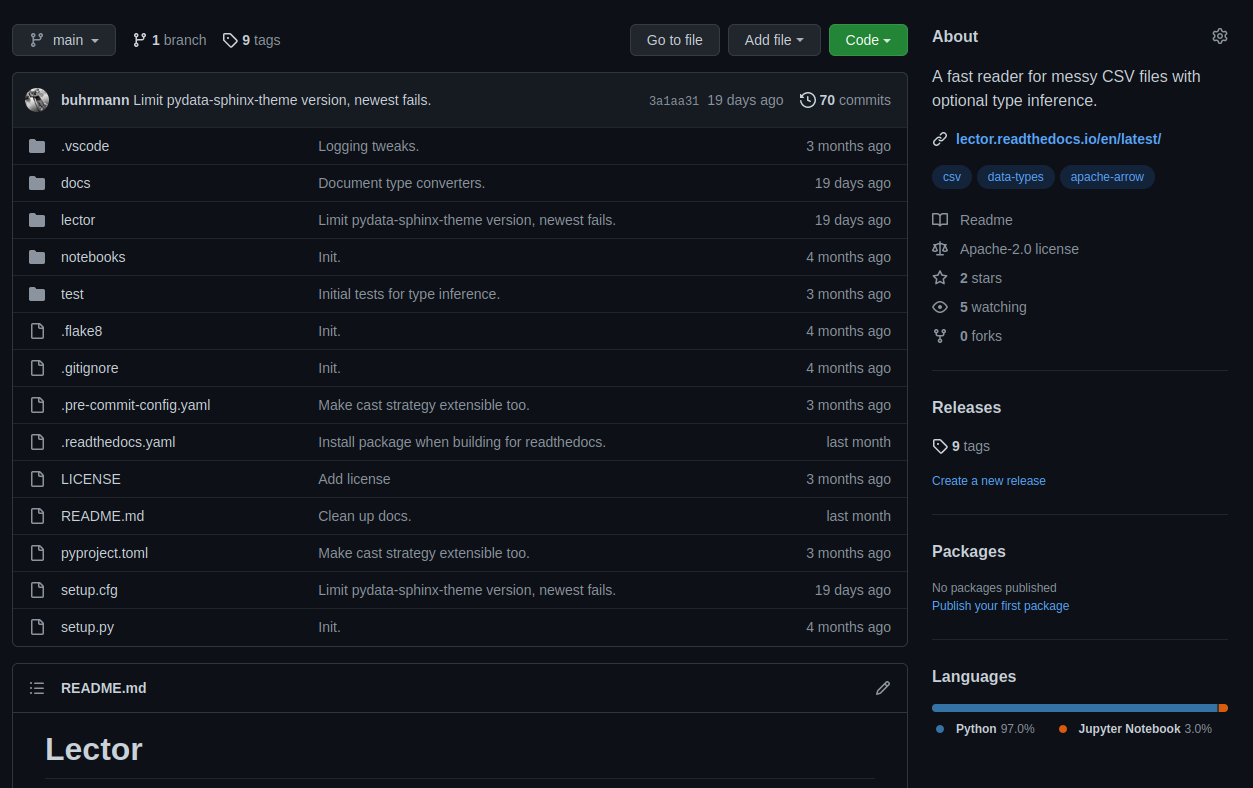